In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

In [2]:
MPRA_df = pd.read_csv('../data/CAGI5_MPRA/CAGI5_MPRA_Sei_feature_0507.csv')
MPRA_df

/tmp/ipykernel_129677/4163715699.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  MPRA_df = pd.read_csv('../data/CAGI5_MPRA/CAGI5_MPRA_Sei_feature_0507.csv')


,element,element_2,chr,pos,ref,alt,value,p-value,cell_type,match_cell_type,seq,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,HEK293T_DNase,HEK293T_H3K4me3,HEK293T_H3K27ac,HEK293T_H3K27me3,HEK293T_H3K4me1,HEK293T_H3K36me3,HEK293T_H3K9me3,HEK293T_CTCF,HeLa_DNase,HeLa_H3K4me3,HeLa_H3K27ac,HeLa_H3K27me3,HeLa_H3K4me1,HeLa_H3K36me3,HeLa_H3K9me3,HeLa_CTCF
0,BCL11A,BCL11A+58,2,60722075,C,-,-0.340,0.005,HEL 92.1.7,K562,CTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGATG...,0.012,0.002,0.002,0.001,0.036,0.001,0.010,0.000,0.033,0.021,0.009,0.003,0.112,0.000,0.023,0.001,0.000,0.008,0.001,0.000,0.016,0.000,0.000,0.000,0.038,0.000,0.001,0.050,0.010,0.000,0.009,0.000
1,BCL11A,BCL11A+58,2,60722075,C,A,-0.050,0.389,HEL 92.1.7,K562,ACTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,0.007,0.001,0.001,0.001,0.024,0.001,0.010,0.000,0.034,0.018,0.008,0.003,0.088,0.000,0.018,0.001,0.000,0.007,0.001,0.000,0.011,0.000,0.000,0.000,0.039,0.000,0.001,0.049,0.011,0.000,0.008,0.000
2,BCL11A,BCL11A+58,2,60722075,C,G,-0.130,0.137,HEL 92.1.7,K562,GCTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,0.007,0.001,0.001,0.001,0.024,0.001,0.010,0.000,0.034,0.018,0.008,0.003,0.090,0.000,0.018,0.001,0.000,0.007,0.001,0.000,0.011,0.000,0.000,0.000,0.038,0.000,0.001,0.050,0.011,0.000,0.008,0.000
3,BCL11A,BCL11A+58,2,60722075,C,T,-0.700,0.000,HEL 92.1.7,K562,TCTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,0.007,0.001,0.001,0.001,0.023,0.001,0.010,0.000,0.033,0.017,0.007,0.003,0.087,0.000,0.019,0.001,0.000,0.006,0.001,0.000,0.011,0.000,0.000,0.000,0.037,0.000,0.001,0.049,0.011,0.000,0.008,0.000
4,BCL11A,BCL11A+58,2,60722076,C,A,-0.080,0.004,HEL 92.1.7,K562,CATAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,0.006,0.001,0.001,0.001,0.023,0.001,0.010,0.000,0.031,0.017,0.007,0.003,0.085,0.000,0.019,0.001,0.000,0.006,0.001,0.000,0.010,0.000,0.000,0.000,0.034,0.000,0.001,0.049,0.010,0.000,0.008,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44657,SORT1,SORT1,1,109817274,-,-,0.000,0.000,HepG2,HepG2,GAACTGGAAAAGCCCTGTCCGGTGAGGGGGCAGAAGGACTCAGCGC...,0.169,0.089,0.024,0.011,0.082,0.001,0.115,0.004,0.723,0.499,0.165,0.076,0.092,0.001,0.012,0.021,0.006,0.190,0.087,0.013,0.196,0.004,0.000,0.011,0.869,0.240,0.186,0.069,0.343,0.002,0.012,0.017
44658,TCF7L2,TCF7L2,10,114757999,-,-,0.000,0.000,MIN6,NaN,AGGTTCTGTTTCTTGCTTAGTCACTTTCTGTTTGAACAAAATTGGA...,0.009,0.002,0.003,0.003,0.005,0.002,0.002,0.001,0.001,0.003,0.001,0.013,0.001,0.001,0.014,0.001,0.001,0.008,0.001,0.005,0.003,0.000,0.000,0.001,0.119,0.003,0.004,0.047,0.020,0.001,0.004,0.003
44659,UC88,UC88,2,162094919,-,-,0.000,0.000,Neuro-2a,NaN,ATACAGATAAATGCACACATGTATACGCGAAAGGTTAACTCGGCGG...,0.426,0.228,0.030,0.013,0.109,0.001,0.125,0.011,0.151,0.332,0.014,0.271,0.050,0.002,0.010,0.010,0.012,0.495,0.204,0.098,0.097,0.007,0.002,0.064,0.317,0.139,0.025,0.096,0.033,0.001,0.040,0.003
44660,ZFAND3,ZFAND3,6,37775275,-,-,0.000,0.000,MIN6,NaN,GTTCATGTTTCCCCCGTATGTGCGTGCGCATGCACATATATAAACA...,0.012,0.003,0.002,0.008,0.012,0.002,0.291,0.006,0.042,0.006,0.001,0.042,0.012,0.002,0.067,0.025,0.002,0.012,0.033,0.003,0.030,0.018,0.000,0.039,0.179,0.002,0.002,0.098,0.015,0.001,0.186,0.016


In [3]:
MPRA_df = MPRA_df.rename(columns={'element': 'exper_name', 'element_2': 'gene_name'})
MPRA_df

,exper_name,gene_name,chr,pos,ref,alt,value,p-value,cell_type,match_cell_type,seq,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,HEK293T_DNase,HEK293T_H3K4me3,HEK293T_H3K27ac,HEK293T_H3K27me3,HEK293T_H3K4me1,HEK293T_H3K36me3,HEK293T_H3K9me3,HEK293T_CTCF,HeLa_DNase,HeLa_H3K4me3,HeLa_H3K27ac,HeLa_H3K27me3,HeLa_H3K4me1,HeLa_H3K36me3,HeLa_H3K9me3,HeLa_CTCF
0,BCL11A,BCL11A+58,2,60722075,C,-,-0.340,0.005,HEL 92.1.7,K562,CTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGATG...,0.012,0.002,0.002,0.001,0.036,0.001,0.010,0.000,0.033,0.021,0.009,0.003,0.112,0.000,0.023,0.001,0.000,0.008,0.001,0.000,0.016,0.000,0.000,0.000,0.038,0.000,0.001,0.050,0.010,0.000,0.009,0.000
1,BCL11A,BCL11A+58,2,60722075,C,A,-0.050,0.389,HEL 92.1.7,K562,ACTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,0.007,0.001,0.001,0.001,0.024,0.001,0.010,0.000,0.034,0.018,0.008,0.003,0.088,0.000,0.018,0.001,0.000,0.007,0.001,0.000,0.011,0.000,0.000,0.000,0.039,0.000,0.001,0.049,0.011,0.000,0.008,0.000
2,BCL11A,BCL11A+58,2,60722075,C,G,-0.130,0.137,HEL 92.1.7,K562,GCTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,0.007,0.001,0.001,0.001,0.024,0.001,0.010,0.000,0.034,0.018,0.008,0.003,0.090,0.000,0.018,0.001,0.000,0.007,0.001,0.000,0.011,0.000,0.000,0.000,0.038,0.000,0.001,0.050,0.011,0.000,0.008,0.000
3,BCL11A,BCL11A+58,2,60722075,C,T,-0.700,0.000,HEL 92.1.7,K562,TCTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,0.007,0.001,0.001,0.001,0.023,0.001,0.010,0.000,0.033,0.017,0.007,0.003,0.087,0.000,0.019,0.001,0.000,0.006,0.001,0.000,0.011,0.000,0.000,0.000,0.037,0.000,0.001,0.049,0.011,0.000,0.008,0.000
4,BCL11A,BCL11A+58,2,60722076,C,A,-0.080,0.004,HEL 92.1.7,K562,CATAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,0.006,0.001,0.001,0.001,0.023,0.001,0.010,0.000,0.031,0.017,0.007,0.003,0.085,0.000,0.019,0.001,0.000,0.006,0.001,0.000,0.010,0.000,0.000,0.000,0.034,0.000,0.001,0.049,0.010,0.000,0.008,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44657,SORT1,SORT1,1,109817274,-,-,0.000,0.000,HepG2,HepG2,GAACTGGAAAAGCCCTGTCCGGTGAGGGGGCAGAAGGACTCAGCGC...,0.169,0.089,0.024,0.011,0.082,0.001,0.115,0.004,0.723,0.499,0.165,0.076,0.092,0.001,0.012,0.021,0.006,0.190,0.087,0.013,0.196,0.004,0.000,0.011,0.869,0.240,0.186,0.069,0.343,0.002,0.012,0.017
44658,TCF7L2,TCF7L2,10,114757999,-,-,0.000,0.000,MIN6,NaN,AGGTTCTGTTTCTTGCTTAGTCACTTTCTGTTTGAACAAAATTGGA...,0.009,0.002,0.003,0.003,0.005,0.002,0.002,0.001,0.001,0.003,0.001,0.013,0.001,0.001,0.014,0.001,0.001,0.008,0.001,0.005,0.003,0.000,0.000,0.001,0.119,0.003,0.004,0.047,0.020,0.001,0.004,0.003
44659,UC88,UC88,2,162094919,-,-,0.000,0.000,Neuro-2a,NaN,ATACAGATAAATGCACACATGTATACGCGAAAGGTTAACTCGGCGG...,0.426,0.228,0.030,0.013,0.109,0.001,0.125,0.011,0.151,0.332,0.014,0.271,0.050,0.002,0.010,0.010,0.012,0.495,0.204,0.098,0.097,0.007,0.002,0.064,0.317,0.139,0.025,0.096,0.033,0.001,0.040,0.003
44660,ZFAND3,ZFAND3,6,37775275,-,-,0.000,0.000,MIN6,NaN,GTTCATGTTTCCCCCGTATGTGCGTGCGCATGCACATATATAAACA...,0.012,0.003,0.002,0.008,0.012,0.002,0.291,0.006,0.042,0.006,0.001,0.042,0.012,0.002,0.067,0.025,0.002,0.012,0.033,0.003,0.030,0.018,0.000,0.039,0.179,0.002,0.002,0.098,0.015,0.001,0.186,0.016


In [4]:
cell_types = ['K562', 'HepG2', 'HEK293T']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

In [5]:
exper_gene_name_dict = {
    'F9': 'F9',
    'FOXE1': 'FOXE1',
    'GP1BA': 'GP1BB',
    'HBB': 'HBB',
    'HBG1': 'HBG1',
    'HNF4A': 'HNF4A (P2)',
    'LDLR': 'LDLR',
    'LDLR.2': 'LDLR',
    'MSMB': 'MSMB',
    'PKLR-24h': 'PKLR',
    'PKLR-48h': 'PKLR',
    'TERT-HEK': 'TERT',
    'TERT-GAa': 'TERT',
    'TERT-GSc': 'TERT',
    'TERT-GBM': 'TERT',
    'BCL11A': 'BCL11A+58',
    'IRF4': 'IRF4',
    'IRF6': 'IRF6',
    'MYCrs6983267': 'MYC (rs6983267)',
    'MYCrs11986220': 'MYC (rs11986220)',
    'RET': 'RET',
    'SORT1': 'SORT1',
    'SORT1.2': 'SORT1',
    'SORT1-flip': 'SORT1',
    'TCF7L2': 'TCF7L2',
    'UC88': 'UC88',
    'ZFAND3': 'ZFAND3',
    'ZRSh-13': 'ZRS',
    'ZRSh-13h2': 'ZRS'
}


exper_name_list = list(exper_gene_name_dict.keys())

CAGI5_gene_name_list = {
    'F9',
    'GP1BB',
    'HBB',
    'HBG1',
    'HNF4A',
    'LDLR',
    'MSMB',
    'PKLR',
    'TERT',
    'IRF4',
    'IRF6',
    # 'MYC', 
    'MYC (rs6983267)', 
    'SORT1',
    'ZFAND3',
}

In [11]:
pearson_df = pd.DataFrame(index=['pred DNase', 'pred activity'], columns=exper_name_list)

for exper_name in exper_gene_name_dict:
    gene_name = exper_gene_name_dict[exper_name]
    if gene_name in CAGI5_gene_name_list:
        condition = (MPRA_df['exper_name'] == exper_name)
        df = MPRA_df[condition]
        cell_type = df['match_cell_type'].unique()[0]

        ref_df = MPRA_df[(MPRA_df['gene_name'] == gene_name) & (MPRA_df['ref'] == '-')]

        if cell_type in cell_types:
            ref_assay = ref_df.iloc[0][f'{cell_type}_DNase']

            pred_assay = df[f'{cell_type}_DNase']
            pred = pred_assay - ref_assay
            # pred = np.log2(pred_assay) - np.log2(ref_assay)
            true = df['value']

            r = pearson(pred, true)[0]
            # print(exper_name, cell_type, r)
            pearson_df.loc['pred DNase', exper_name] = r

print(pearson_df)

                 F9 FOXE1 GP1BA   HBB  HBG1 HNF4A  LDLR LDLR.2  MSMB PKLR-24h PKLR-48h TERT-HEK TERT-GAa TERT-GSc TERT-GBM BCL11A IRF4 IRF6 MYCrs6983267 MYCrs11986220  RET SORT1 SORT1.2 SORT1-flip TCF7L2 UC88 ZFAND3 ZRSh-13 ZRSh-13h2
pred DNase    0.112   NaN 0.397 0.270 0.335   NaN 0.405  0.443 0.068    0.401    0.444      NaN      NaN      NaN      NaN    NaN  NaN  NaN        0.207           NaN  NaN 0.583   0.527      0.616    NaN  NaN    NaN     NaN       NaN
pred activity   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN      NaN      NaN      NaN      NaN      NaN      NaN    NaN  NaN  NaN          NaN           NaN  NaN   NaN     NaN        NaN    NaN  NaN    NaN     NaN       NaN


In [12]:
cell_types = ['K562', 'HepG2', 'HEK293T', 'HeLa']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

y_pred = np.load(f'../saved/0507_GosaiMPRA_MyResTransformer3/0507_044041/CAGI5_pred.npy')

cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred
MPRA_df

,exper_name,gene_name,chr,pos,ref,alt,value,p-value,cell_type,match_cell_type,seq,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,HEK293T_DNase,HEK293T_H3K4me3,HEK293T_H3K27ac,HEK293T_H3K27me3,HEK293T_H3K4me1,HEK293T_H3K36me3,HEK293T_H3K9me3,HEK293T_CTCF,HeLa_DNase,HeLa_H3K4me3,HeLa_H3K27ac,HeLa_H3K27me3,HeLa_H3K4me1,HeLa_H3K36me3,HeLa_H3K9me3,HeLa_CTCF,K562_pred,HepG2_pred,HEK293T_pred,HeLa_pred
0,BCL11A,BCL11A+58,2,60722075,C,-,-0.340,0.005,HEL 92.1.7,K562,CTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGATG...,0.012,0.002,0.002,0.001,0.036,0.001,0.010,0.000,0.033,0.021,0.009,0.003,0.112,0.000,0.023,0.001,0.000,0.008,0.001,0.000,0.016,0.000,0.000,0.000,0.038,0.000,0.001,0.050,0.010,0.000,0.009,0.000,-0.265,-0.194,-0.446,-0.245
1,BCL11A,BCL11A+58,2,60722075,C,A,-0.050,0.389,HEL 92.1.7,K562,ACTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,0.007,0.001,0.001,0.001,0.024,0.001,0.010,0.000,0.034,0.018,0.008,0.003,0.088,0.000,0.018,0.001,0.000,0.007,0.001,0.000,0.011,0.000,0.000,0.000,0.039,0.000,0.001,0.049,0.011,0.000,0.008,0.000,-0.486,-0.295,-0.605,-0.398
2,BCL11A,BCL11A+58,2,60722075,C,G,-0.130,0.137,HEL 92.1.7,K562,GCTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,0.007,0.001,0.001,0.001,0.024,0.001,0.010,0.000,0.034,0.018,0.008,0.003,0.090,0.000,0.018,0.001,0.000,0.007,0.001,0.000,0.011,0.000,0.000,0.000,0.038,0.000,0.001,0.050,0.011,0.000,0.008,0.000,-0.515,-0.327,-0.633,-0.441
3,BCL11A,BCL11A+58,2,60722075,C,T,-0.700,0.000,HEL 92.1.7,K562,TCTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,0.007,0.001,0.001,0.001,0.023,0.001,0.010,0.000,0.033,0.017,0.007,0.003,0.087,0.000,0.019,0.001,0.000,0.006,0.001,0.000,0.011,0.000,0.000,0.000,0.037,0.000,0.001,0.049,0.011,0.000,0.008,0.000,-0.548,-0.361,-0.661,-0.467
4,BCL11A,BCL11A+58,2,60722076,C,A,-0.080,0.004,HEL 92.1.7,K562,CATAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,0.006,0.001,0.001,0.001,0.023,0.001,0.010,0.000,0.031,0.017,0.007,0.003,0.085,0.000,0.019,0.001,0.000,0.006,0.001,0.000,0.010,0.000,0.000,0.000,0.034,0.000,0.001,0.049,0.010,0.000,0.008,0.000,-0.514,-0.328,-0.622,-0.445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44657,SORT1,SORT1,1,109817274,-,-,0.000,0.000,HepG2,HepG2,GAACTGGAAAAGCCCTGTCCGGTGAGGGGGCAGAAGGACTCAGCGC...,0.169,0.089,0.024,0.011,0.082,0.001,0.115,0.004,0.723,0.499,0.165,0.076,0.092,0.001,0.012,0.021,0.006,0.190,0.087,0.013,0.196,0.004,0.000,0.011,0.869,0.240,0.186,0.069,0.343,0.002,0.012,0.017,0.523,1.421,0.871,1.253
44658,TCF7L2,TCF7L2,10,114757999,-,-,0.000,0.000,MIN6,NaN,AGGTTCTGTTTCTTGCTTAGTCACTTTCTGTTTGAACAAAATTGGA...,0.009,0.002,0.003,0.003,0.005,0.002,0.002,0.001,0.001,0.003,0.001,0.013,0.001,0.001,0.014,0.001,0.001,0.008,0.001,0.005,0.003,0.000,0.000,0.001,0.119,0.003,0.004,0.047,0.020,0.001,0.004,0.003,-0.071,-0.198,-0.181,0.106
44659,UC88,UC88,2,162094919,-,-,0.000,0.000,Neuro-2a,NaN,ATACAGATAAATGCACACATGTATACGCGAAAGGTTAACTCGGCGG...,0.426,0.228,0.030,0.013,0.109,0.001,0.125,0.011,0.151,0.332,0.014,0.271,0.050,0.002,0.010,0.010,0.012,0.495,0.204,0.098,0.097,0.007,0.002,0.064,0.317,0.139,0.025,0.096,0.033,0.001,0.040,0.003,1.485,1.551,1.863,1.522
44660,ZFAND3,ZFAND3,6,37775275,-,-,0.000,0.000,MIN6,NaN,GTTCATGTTTCCCCCGTATGTGCGTGCGCATGCACATATATAAACA...,0.012,0.003,0.002,0.008,0.012,0.002,0.291,0.006,0.042,0.006,0.001,0.042,0.012,0.002,0.067,0.025,0.002,0.012,0.033,0.003,0.030,0.018,0.000,0.039,0.179,0.002,0.002,0.098,0.015,0.001,0.186,0.016,-0.476,-0.463,-0.251,-0.450


In [13]:

cell_types = ['K562', 'HepG2', 'HEK293T']

for exper_name in exper_gene_name_dict:
    gene_name = exper_gene_name_dict[exper_name]
    if gene_name in CAGI5_gene_name_list:
        condition = (MPRA_df['exper_name'] == exper_name)
        df = MPRA_df[condition]
        cell_type = df['match_cell_type'].unique()[0]

        ref_df = MPRA_df[(MPRA_df['gene_name'] == gene_name) & (MPRA_df['ref'] == '-')]

        if cell_type in cell_types:
            ref_assay = ref_df.iloc[0][f'{cell_type}_pred']

            pred_assay = df[f'{cell_type}_pred']
            pred = pred_assay - ref_assay
            #pred = np.log2(pred_assay) - np.log2(ref_assay)
            true = df['value']

            r = pearson(pred, true)[0]
            # print(exper_name, cell_type, r)
            pearson_df.loc['pred activity', exper_name] = r


In [14]:
pearson_df

,F9,FOXE1,GP1BA,HBB,HBG1,HNF4A,LDLR,LDLR.2,MSMB,PKLR-24h,PKLR-48h,TERT-HEK,TERT-GAa,TERT-GSc,TERT-GBM,BCL11A,IRF4,IRF6,MYCrs6983267,MYCrs11986220,RET,SORT1,SORT1.2,SORT1-flip,TCF7L2,UC88,ZFAND3,ZRSh-13,ZRSh-13h2
pred DNase,0.112,NaN,0.397,0.270,0.335,NaN,0.405,0.443,0.068,0.401,0.444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.207,NaN,NaN,0.583,0.527,0.616,NaN,NaN,NaN,NaN,NaN
pred activity,0.485,NaN,0.274,0.411,0.653,NaN,0.524,0.588,0.148,0.482,0.534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.171,NaN,NaN,0.458,0.413,0.481,NaN,NaN,NaN,NaN,NaN


In [15]:
cell_types_list = [MPRA_df[MPRA_df['exper_name'] == exper_name].iloc[0]['match_cell_type'] for exper_name in exper_name_list]
cell_types_list

['HepG2',
 nan,
 'K562',
 'K562',
 'K562',
 'HEK293T',
 'HepG2',
 'HepG2',
 'HEK293T',
 'K562',
 'K562',
 nan,
 nan,
 nan,
 nan,
 'K562',
 nan,
 nan,
 'HEK293T',
 nan,
 nan,
 'HepG2',
 'HepG2',
 'HepG2',
 nan,
 nan,
 nan,
 nan,
 nan]

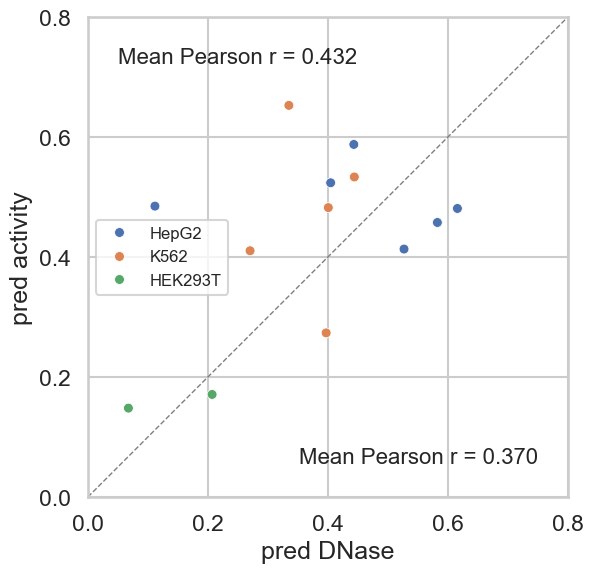

In [29]:
plt.figure(figsize=(6,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

x = pearson_df.loc['pred DNase']
y = pearson_df.loc['pred activity']
sns.scatterplot(x=x, y=y, s=50, hue=cell_types_list)

plt.text(0.75, 0.05, f'Mean Pearson r = {x.mean():.3f}', fontsize=16, ha='right', va='bottom')
plt.text(0.05, 0.75, f'Mean Pearson r = {y.mean():.3f}', fontsize=16, ha='left', va='top')

plt.plot([0, 0.8], [0, 0.8], linestyle='--', color='gray', linewidth=1)
plt.axis('equal')
# plt.grid()
plt.xticks([0, 0.2, 0.4, 0.6, 0.8])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8])
plt.xlim(0, 0.8)
plt.ylim(0, 0.8)
plt.legend(fontsize=12)
plt.savefig('figures/CAGI5_MPRA_pearson_comparison.png', dpi=400)

In [23]:
metadata_df = pd.read_csv('../data/CAGI5_MPRA/metadata.tsv', sep='\t')
metadata_df

,Name,Genomic coordinates (GRCh37),Genomic coordinates (GRCh38),Transcript,Associated Phenotype,Luciferase vector,MPRA vector,Cell line,Transf. time (hr),Fold change (Wild type),Fold Change (MPRA),Construct size (bp),Type,Other_Name
0,F9,"chrX:138,612,622-138,612,924","chrX:139,530,463-139,530,765",NM_000133.3,Hemophilia B,pGL4.11b,pGL4.11c,HepG2,24,2.6,2.1,303,promoter,F9
1,FOXE1,"chr9:100,615,537-100,616,136","chr9:97,853,255-97,853,854",NM_004473.3,Thyroid cancer,pGL4.11b,pGL4.11c,HeLa,24,4.2,2.5,600,promoter,FOXE1
2,GP1BB,"chr22:19,710,789-19,711,173","chr22:19,723,266-19,723,650",NM_000407.4,Bernard-Soulier Syndrome,pGL4.11b,pGL4.11c,HEL 92.1.7,24,22.1,12.3,385,promoter,GP1BA
3,HBB,"chr11:5,248,252-5,248,438","chr11:5,227,022-5,227,208",NM_000518.4,Thalassemia,pGL4.11b,pGL4.11c,HEL 92.1.7,24,14.3,8.4,187,promoter,HBB
4,HBG1,"chr11:5,271,035-5,271,308","chr11:5,249,805-5,250,078",NM_000559.2,Hereditary persistence of fetal hemoglobin,pGL4.11b,pGL4.11c,HEL 92.1.7,24,118.1,41.8,274,promoter,HBG1
5,HNF4A (P2),"chr20:42,984,160-42,984,444","chr20:44,355,520-44,355,804",NM_175914.4,Maturity-onset diabetes of the young (MODY),pGL4.11b,pGL4.11c,HEK293T,24,2.8,1.3,285,promoter,HNF4A
6,LDLR,"chr19:11,199,907-11,200,224","chr19:11,089,231-11,089,548",NM_000527.4,Familial hypercholesterolemia,pGL4.11b,pGL4.11b,HepG2,24,110.7,76.6,318,promoter,"LDLR, LDLR.2"
7,MSMB,"chr10:51,548,988-51,549,578","chr10:46,046,244-46,046,834",NM_002443.3,Prostate cancer,pGL4.11b,pGL4.11c,HEK293T,24,8.4,3.4,593,promoter,MSMB
8,PKLR,"chr1:155,271,186-155,271,655","chr1:155,301,395-155,301,864",NM_000298.5,Pyruvate kinase deficiency,pGL4.11b,pGL4.11c,K562,48,29.4,9.6,470,promoter,"PKLR-24h, PKLR-48h"
9,TERT,"chr5:1,295,104-1,295,362","chr5:1,294,989-1,295,247",NM_198253.2,Various types of cancer,pGL4.11b,pGL4.11b,"HEK293T, SF7996",24,"231.8,5.2","148.2, 2.7",259,promoter,"TERT-HEK, TERT-GAa, TERT-GSc, TERT-GBM"


In [25]:
element_type_list = [metadata_df[metadata_df['Name'] == exper_gene_name_dict[exper_name]].iloc[0]['Type'] for exper_name in exper_name_list]
element_type_list

['promoter',
 'promoter',
 'promoter',
 'promoter',
 'promoter',
 'promoter',
 'promoter',
 'promoter',
 'promoter',
 'promoter',
 'promoter',
 'promoter',
 'promoter',
 'promoter',
 'promoter',
 'enhancer',
 'enhancer',
 'enhancer',
 'enhancer',
 'enhancer',
 'enhancer',
 'enhancer',
 'enhancer',
 'enhancer',
 'enhancer',
 'enhancer',
 'enhancer',
 'enhancer',
 'enhancer']

In [26]:
pearson_df

,F9,FOXE1,GP1BA,HBB,HBG1,HNF4A,LDLR,LDLR.2,MSMB,PKLR-24h,PKLR-48h,TERT-HEK,TERT-GAa,TERT-GSc,TERT-GBM,BCL11A,IRF4,IRF6,MYCrs6983267,MYCrs11986220,RET,SORT1,SORT1.2,SORT1-flip,TCF7L2,UC88,ZFAND3,ZRSh-13,ZRSh-13h2
Sei DNase,0.112,NaN,0.397,0.270,0.335,NaN,0.405,0.443,0.068,0.401,0.444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.207,NaN,NaN,0.583,0.527,0.616,NaN,NaN,NaN,NaN,NaN
Enhancer activity,0.485,NaN,0.274,0.411,0.653,NaN,0.524,0.588,0.148,0.482,0.534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.171,NaN,NaN,0.458,0.413,0.481,NaN,NaN,NaN,NaN,NaN


0.7127777318465318


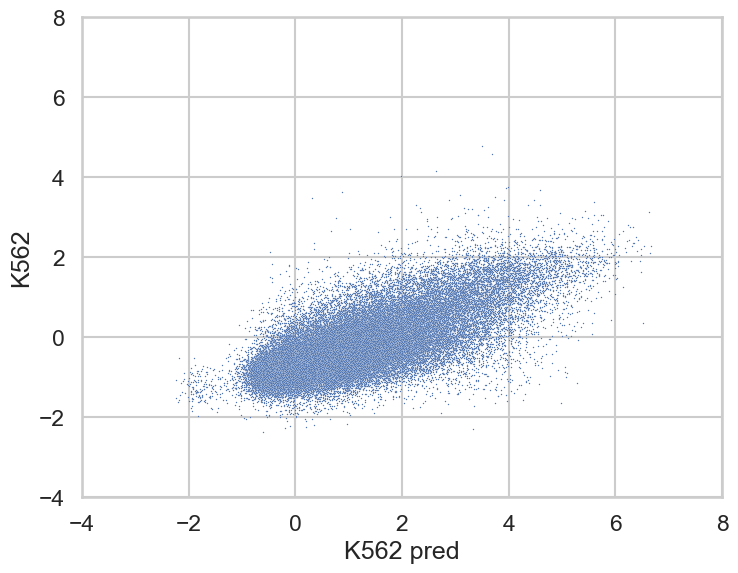

In [39]:
plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

x = MPRA_df['K562_pred']
y = MPRA_df['K562']
sns.scatterplot(x=x, y=y, s=1)
r, _ = pearson(x, y)
print(r)
plt.xlim(-4, 8)
plt.ylim(-4, 8)
plt.xlabel('K562 pred')
plt.ylabel('K562')

plt.savefig('figures/Agarwal_MPRA_K562_pred.png', dpi=400)

0.7105793201384519


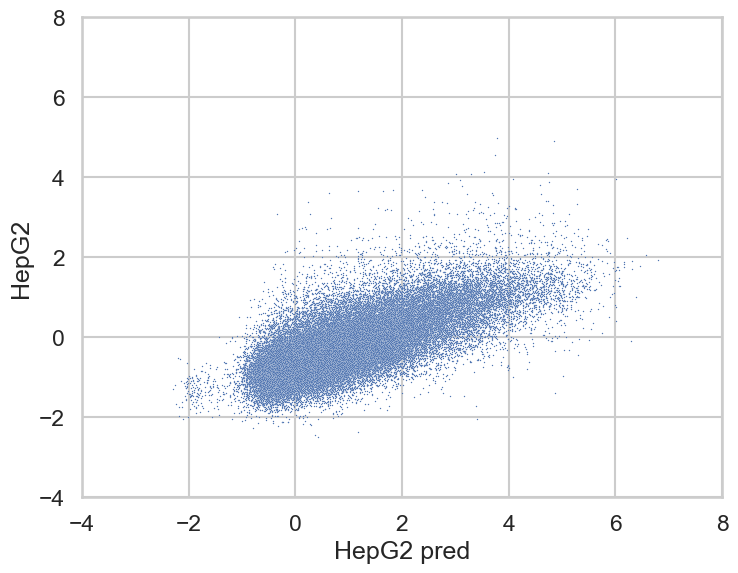

In [38]:
plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

x = MPRA_df['HepG2_pred']
y = MPRA_df['HepG2']
sns.scatterplot(x=x, y=y, s=1)
r, _ = pearson(x, y)
print(r)
plt.xlim(-4, 8)
plt.ylim(-4, 8)
plt.xlabel('HepG2 pred')
plt.ylabel('HepG2')

plt.savefig('figures/Agarwal_MPRA_HepG2_pred.png', dpi=400)

0.6259553270798905


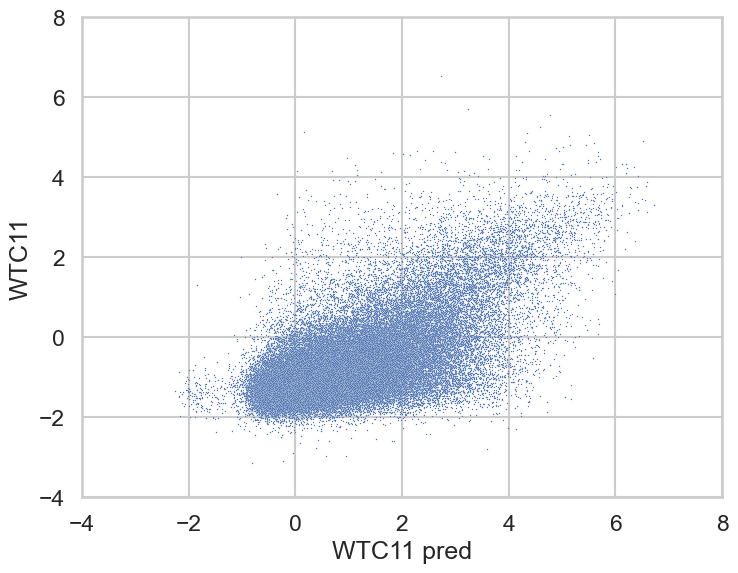

In [37]:
plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

x = MPRA_df['WTC11_pred']
y = MPRA_df['WTC11']
sns.scatterplot(x=x, y=y, s=1)
r, _ = pearson(x, y)
print(r)
plt.xlim(-4, 8)
plt.ylim(-4, 8)
plt.xlabel('WTC11 pred')
plt.ylabel('WTC11')

plt.savefig('figures/Agarwal_MPRA_WTC11_pred.png', dpi=400)

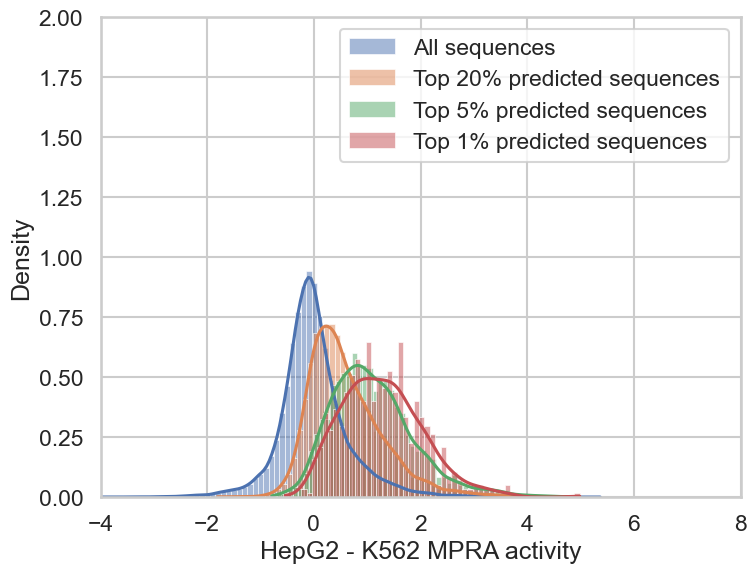

In [16]:
cell_types = ['K562', 'HepG2']
cell_types_pred = [f'{cell}_pred' for cell in cell_types]

MPRA_df['HepG2-K562'] = MPRA_df['HepG2'] - MPRA_df['K562']
MPRA_df['HepG2-K562_pred'] = MPRA_df['HepG2_pred'] - MPRA_df['K562_pred']


plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

sns.histplot(MPRA_df['HepG2-K562'], binwidth=1e-1, stat='density', alpha=0.5, label='All sequences', kde=True)

threshold = np.percentile(MPRA_df['HepG2-K562_pred'], 80)
filtered_df = MPRA_df[MPRA_df['HepG2-K562_pred'] > threshold]
sns.histplot(filtered_df['HepG2-K562'], binwidth=1e-1, stat='density', alpha=0.5, label='Top 20% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HepG2-K562_pred'], 95)
filtered_df = MPRA_df[MPRA_df['HepG2-K562_pred'] > threshold]
sns.histplot(filtered_df['HepG2-K562'], binwidth=1e-1, stat='density', alpha=0.5, label='Top 5% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HepG2-K562_pred'], 99)
filtered_df = MPRA_df[MPRA_df['HepG2-K562_pred'] > threshold]
sns.histplot(filtered_df['HepG2-K562'], binwidth=1e-1, stat='density', alpha=0.5, label='Top 1% predicted sequences', kde=True)

plt.xlim(-4, 8)
plt.ylim(0, 2)
plt.xlabel('HepG2 - K562 MPRA activity')
plt.ylabel('Density')
plt.legend()
plt.savefig('figures/Agarwal_MPRA_HepG2-K562_sequence_prioritization.png', dpi=400)

In [7]:
# seq feature
# train 3 cell types

cell_types = ['K562', 'HepG2']

y_pred = np.load(f'../saved/0504_GosaiMPRA_MyResTransformer3/0504_134132/Agarwal_pred.npy')
cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

In [8]:
# 预测值和真实值的相关性

for data_split in ['train', 'test', 'const', 'diff']:
    corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_pred)
    for cell_type in cell_types:
        for cell_type_pred in cell_types_pred:
            condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_pred}']
            r, p = pearson(x, y)
            corr_matrix.loc[cell_type, cell_type_pred] = r
    print(data_split)
    print(corr_matrix)

train
      K562_pred HepG2_pred
K562      0.727      0.617
HepG2     0.595      0.706
test
      K562_pred HepG2_pred
K562      0.702      0.567
HepG2     0.530      0.676
const
      K562_pred HepG2_pred
K562      0.746      0.698
HepG2     0.690      0.734
diff
      K562_pred HepG2_pred
K562      0.558     -0.027
HepG2     0.042      0.609


0.720309738396121


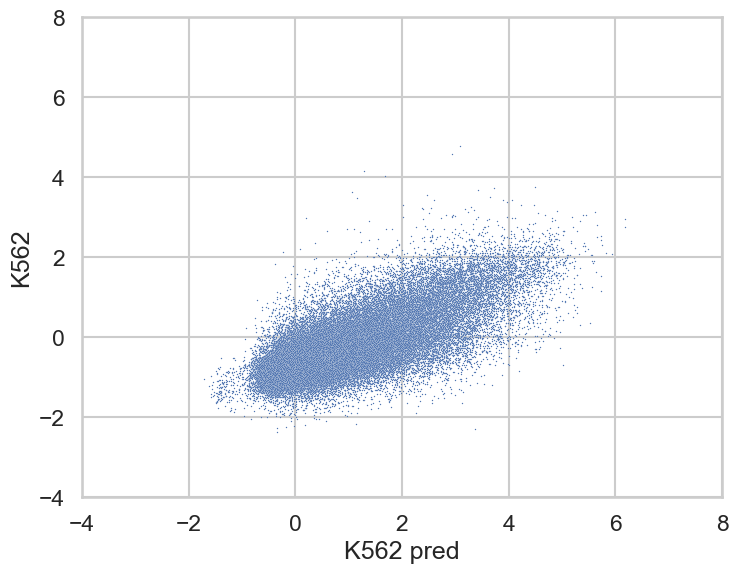

In [8]:
plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

x = MPRA_df['K562_pred']
y = MPRA_df['K562']
sns.scatterplot(x=x, y=y, s=1)
r, _ = pearson(x, y)
print(r)
plt.xlim(-4, 8)
plt.ylim(-4, 8)
plt.xlabel('K562 pred')
plt.ylabel('K562')

plt.savefig('figures/Agarwal_MPRA_K562_pred.png', dpi=400)

0.7098594699892655


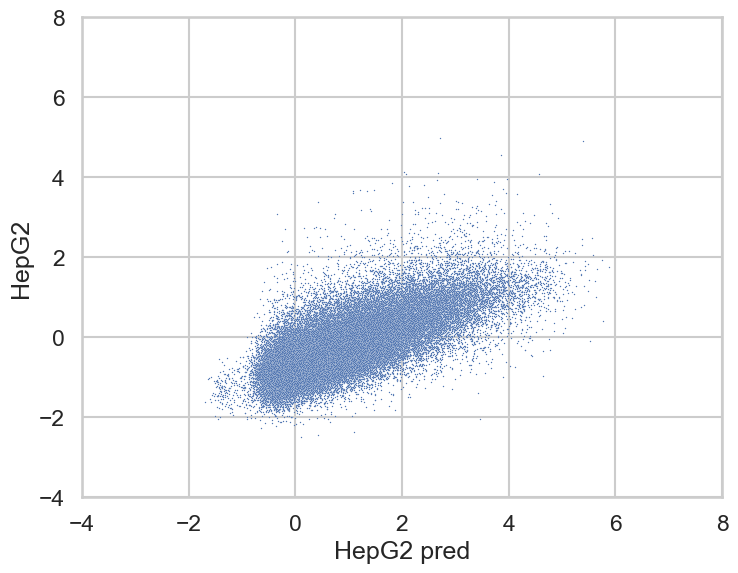

In [9]:
plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

x = MPRA_df['HepG2_pred']
y = MPRA_df['HepG2']
sns.scatterplot(x=x, y=y, s=1)
r, _ = pearson(x, y)
print(r)
plt.xlim(-4, 8)
plt.ylim(-4, 8)
plt.xlabel('HepG2 pred')
plt.ylabel('HepG2')

plt.savefig('figures/Agarwal_MPRA_HepG2_pred.png', dpi=400)

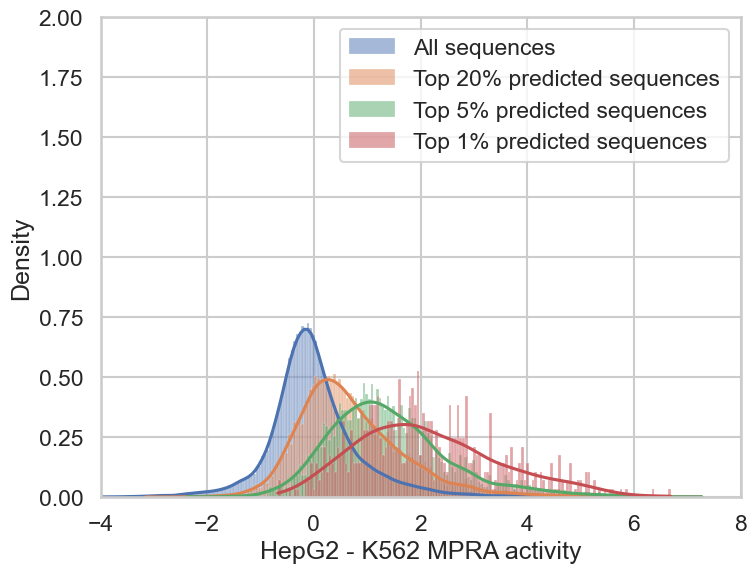

In [30]:
cell_types = ['K562', 'HepG2']
cell_types_pred = [f'{cell}_pred' for cell in cell_types]

MPRA_df['HepG2-K562'] = MPRA_df['HepG2'] - MPRA_df['K562']
MPRA_df['HepG2-K562_pred'] = MPRA_df['HepG2_pred'] - MPRA_df['K562_pred']


plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

sns.histplot(MPRA_df['HepG2-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='All sequences', kde=True)

threshold = np.percentile(MPRA_df['HepG2-K562_pred'], 80)
filtered_df = MPRA_df[MPRA_df['HepG2-K562_pred'] > threshold]
sns.histplot(filtered_df['HepG2-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 20% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HepG2-K562_pred'], 95)
filtered_df = MPRA_df[MPRA_df['HepG2-K562_pred'] > threshold]
sns.histplot(filtered_df['HepG2-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 5% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HepG2-K562_pred'], 99)
filtered_df = MPRA_df[MPRA_df['HepG2-K562_pred'] > threshold]
sns.histplot(filtered_df['HepG2-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 1% predicted sequences', kde=True)

plt.xlim(-4, 8)
plt.ylim(0, 2)
plt.xlabel('HepG2 - K562 MPRA activity')
plt.ylabel('Density')
plt.legend()
plt.savefig('figures/Agarwal_MPRA_HepG2-K562_sequence_prioritization.png', dpi=400)

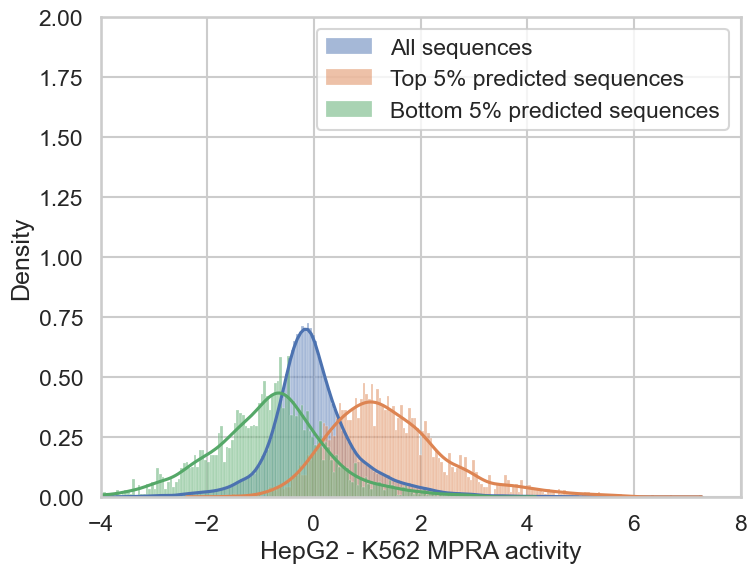

In [31]:
cell_types = ['K562', 'HepG2']
cell_types_pred = [f'{cell}_pred' for cell in cell_types]

MPRA_df['HepG2-K562'] = MPRA_df['HepG2'] - MPRA_df['K562']
MPRA_df['HepG2-K562_pred'] = MPRA_df['HepG2_pred'] - MPRA_df['K562_pred']


plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

sns.histplot(MPRA_df['HepG2-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='All sequences', kde=True)

# threshold = np.percentile(MPRA_df['HepG2-K562_pred'], 80)
# filtered_df = MPRA_df[MPRA_df['HepG2-K562_pred'] > threshold]
# sns.histplot(filtered_df['HepG2-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 20% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HepG2-K562_pred'], 95)
filtered_df = MPRA_df[MPRA_df['HepG2-K562_pred'] > threshold]
sns.histplot(filtered_df['HepG2-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 5% predicted sequences', kde=True)


threshold = np.percentile(MPRA_df['HepG2-K562_pred'], 5)
filtered_df = MPRA_df[MPRA_df['HepG2-K562_pred'] < threshold]
sns.histplot(filtered_df['HepG2-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Bottom 5% predicted sequences', kde=True)

# threshold = np.percentile(MPRA_df['HepG2-K562_pred'], 99)
# filtered_df = MPRA_df[MPRA_df['HepG2-K562_pred'] > threshold]
# sns.histplot(filtered_df['HepG2-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 1% predicted sequences', kde=True)

plt.xlim(-4, 8)
plt.ylim(0, 2)
plt.xlabel('HepG2 - K562 MPRA activity')
plt.ylabel('Density')
plt.legend()
plt.savefig('figures/Agarwal_MPRA_HepG2-K562_sequence_prioritization.png', dpi=400)

In [27]:
MPRA_df

,Unnamed: 0,seq,chr,HepG2,K562,WTC11,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,K562_pred,HepG2_pred,std
0,0,AGGACCGGATCAACTGTAGGACCAGGCTCTGCCTCCTTCTCTCTCC...,chr1,1.114,0.352,-0.387,-0.602,0.322,0.220,0.706,0.009,0.340,0.960,-0.687,-0.750,0.193,-0.057,0.843,-0.539,1.015,1.033,-0.759,0.584,0.554,0.539
1,1,AGGACCGGATCAACTTGTACTTGCCTTAGGAGGTCAAACACATTAG...,chr10,-1.315,-1.246,-1.507,-1.419,-0.894,-1.021,0.389,-0.788,-0.499,-1.055,-0.881,-1.287,-0.984,-0.786,0.934,-0.524,0.043,0.889,-0.875,-0.812,-0.807,0.049
2,2,AGGACCGGATCAACTTAGCTCAACACAAATCCATCACTGAAAGCAG...,chr10,0.166,0.490,0.655,0.950,-0.619,-1.073,-1.610,-0.786,0.437,-0.477,1.651,0.886,0.005,-0.289,-1.309,-0.677,-0.051,-1.905,1.663,-0.002,0.030,0.229
3,3,AGGACCGGATCAACTGACCCTAAATCAGTATGGGGAAAGGTCCCCA...,chr10,1.404,1.826,-0.637,-0.241,-0.046,0.359,0.210,0.698,-0.461,-0.468,-0.632,-0.026,0.054,0.569,-0.011,0.542,-0.215,0.113,-0.645,0.283,0.375,0.299
4,4,AGGACCGGATCAACTGTGATCTCAGCTTACTGCAACCTCTGCCTCC...,chr10,-0.809,-0.573,-0.612,-1.352,-2.547,-2.427,-2.914,-2.849,-2.305,-0.271,0.384,-1.941,-3.134,-2.488,-2.899,-2.863,-2.150,-1.598,0.349,-0.422,-0.427,0.167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56970,56970,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-1.363,-1.159,-1.680,-1.440,-0.627,-0.631,0.070,-1.188,-0.831,-0.715,-0.956,-1.710,-0.861,-0.698,0.588,-1.363,-0.085,0.308,-1.069,-0.573,-0.570,0.144
56971,56971,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-0.535,-1.177,-1.637,-0.992,-0.404,-0.481,-0.707,-0.460,-1.205,-1.298,-1.093,-1.021,-0.416,-0.405,-0.426,-0.075,-1.632,0.087,-1.110,0.551,0.563,0.454
56972,56972,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCATGTTTGCTTT...,chrnan,-0.906,-0.474,-1.083,-1.146,-0.661,-0.507,-0.687,-0.478,-0.520,-1.606,-0.818,1.691,0.535,1.078,-0.889,1.933,-2.140,-3.367,-0.264,0.038,0.096,0.305
56973,56973,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-1.416,-0.960,-1.606,-1.915,-1.521,-1.359,-0.612,-1.940,-1.657,-1.336,-1.177,-1.719,-1.340,-0.952,-0.103,-1.088,-1.158,0.085,-1.183,-0.576,-0.571,0.323


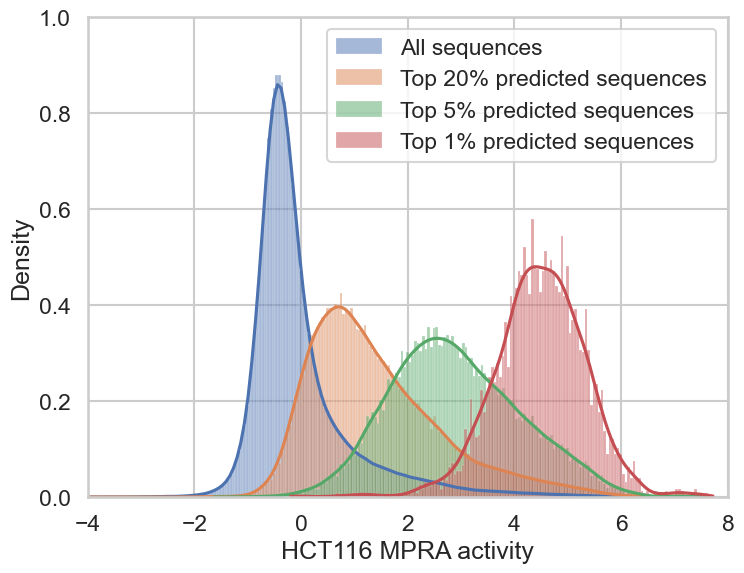

In [51]:
MPRA_df = MPRA_df[MPRA_df['HCT116'].notna()]

plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

sns.histplot(MPRA_df['HCT116'], binwidth=5e-2, stat='density', alpha=0.5, label='All sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116_pred'], 80)
filtered_df = MPRA_df[MPRA_df['HCT116_pred'] > threshold]
sns.histplot(filtered_df['HCT116'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 20% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116_pred'], 95)
filtered_df = MPRA_df[MPRA_df['HCT116_pred'] > threshold]
sns.histplot(filtered_df['HCT116'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 5% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116_pred'], 99)
filtered_df = MPRA_df[MPRA_df['HCT116_pred'] > threshold]
sns.histplot(filtered_df['HCT116'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 1% predicted sequences', kde=True)


plt.xlim(-4, 8)
plt.ylim(0, 1)
plt.xlabel('HCT116 MPRA activity')
plt.ylabel('Density')
plt.legend()
plt.savefig('figures/Gosai_MPRA_HCT116_sequence_prioritization.png', dpi=400)

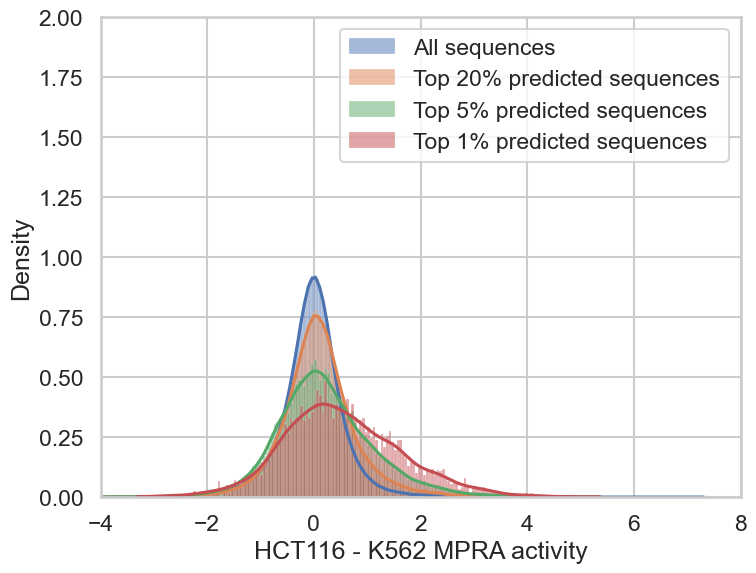

In [50]:
MPRA_df = MPRA_df[MPRA_df['HCT116'].notna()]

cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116']
cell_types_pred = [f'{cell}_pred' for cell in cell_types]

MPRA_df['HCT116-K562'] = MPRA_df['HCT116'] - MPRA_df['K562']
MPRA_df['HCT116-K562_pred'] = MPRA_df['HCT116_pred'] - MPRA_df['K562_pred']


plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

sns.histplot(MPRA_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='All sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116-K562_pred'], 80)
filtered_df = MPRA_df[MPRA_df['HCT116-K562_pred'] > threshold]
sns.histplot(filtered_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 20% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116-K562_pred'], 95)
filtered_df = MPRA_df[MPRA_df['HCT116-K562_pred'] > threshold]
sns.histplot(filtered_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 5% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116-K562_pred'], 99)
filtered_df = MPRA_df[MPRA_df['HCT116-K562_pred'] > threshold]
sns.histplot(filtered_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 1% predicted sequences', kde=True)

plt.xlim(-4, 8)
plt.ylim(0, 2)
plt.xlabel('HCT116 - K562 MPRA activity')
plt.ylabel('Density')
plt.legend()
plt.savefig('figures/Gosai_MPRA_HCT116-K562_sequence_prioritization.png', dpi=400)

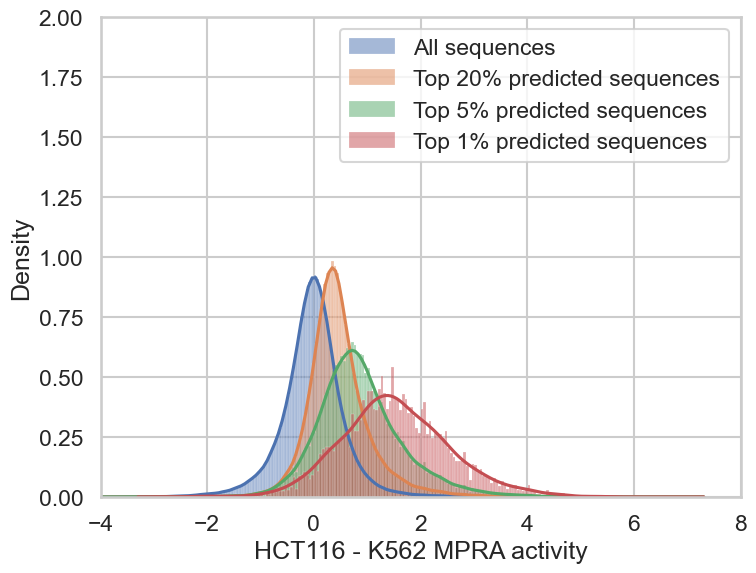

In [56]:
MPRA_df = MPRA_df[MPRA_df['HCT116'].notna()]

cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116']
cell_types_pred = [f'{cell}_pred' for cell in cell_types]

MPRA_df['HCT116-K562'] = MPRA_df['HCT116'] - MPRA_df['K562']
MPRA_df['HCT116-K562_pred'] = MPRA_df['HCT116_pred'] - MPRA_df['K562']
#######MPRA_df['HCT116-K562_pred'] = MPRA_df['HCT116_pred'] - MPRA_df['K562_pred']
#######这里我应该假设已知K562活性吗？

plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

sns.histplot(MPRA_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='All sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116-K562_pred'], 80)
filtered_df = MPRA_df[MPRA_df['HCT116-K562_pred'] > threshold]
sns.histplot(filtered_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 20% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116-K562_pred'], 95)
filtered_df = MPRA_df[MPRA_df['HCT116-K562_pred'] > threshold]
sns.histplot(filtered_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 5% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116-K562_pred'], 99)
filtered_df = MPRA_df[MPRA_df['HCT116-K562_pred'] > threshold]
sns.histplot(filtered_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 1% predicted sequences', kde=True)

plt.xlim(-4, 8)
plt.ylim(0, 2)
plt.xlabel('HCT116 - K562 MPRA activity')
plt.ylabel('Density')
plt.legend()
plt.savefig('figures/Gosai_MPRA_HCT116-K562_sequence_prioritization.png', dpi=400)

0.2912329242263634


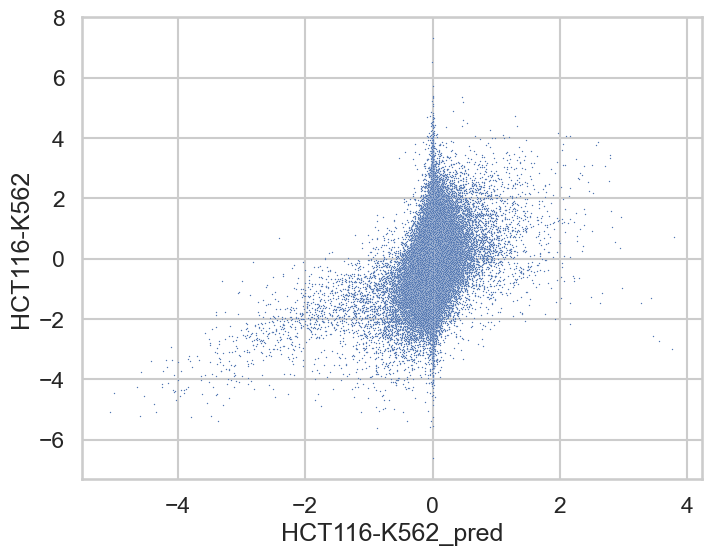

In [41]:
x=MPRA_df['HCT116-K562_pred']
y=MPRA_df['HCT116-K562']
sns.scatterplot(x=x, y=y, s=1)
r, _ = pearson(x, y)
print(r)

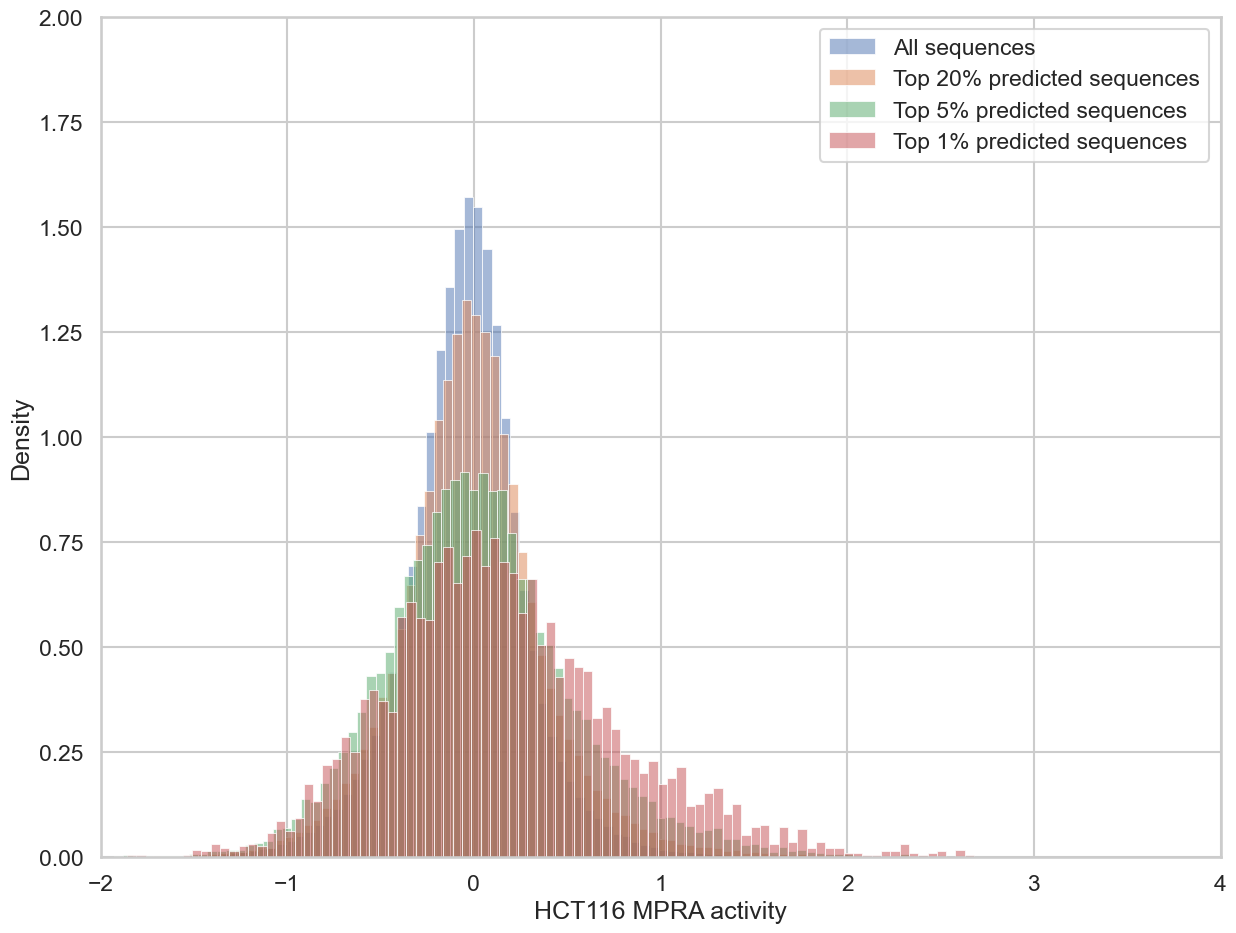

In [39]:
MPRA_df = MPRA_df[MPRA_df['HCT116'].notna()]

cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116']
cell_types_pred = [f'{cell}_pred' for cell in cell_types]

MPRA_df['HCT116_deviation'] = MPRA_df['HCT116'] - MPRA_df[cell_types].mean(axis=1)
MPRA_df['HCT116_pred_deviation'] = MPRA_df['HCT116_pred'] - MPRA_df[cell_types_pred].mean(axis=1)


plt.figure(figsize=(16,12), dpi=100)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)

sns.histplot(MPRA_df['HCT116_deviation'], binwidth=5e-2, stat='density', alpha=0.5, label='All sequences')

threshold = np.percentile(MPRA_df['HCT116_pred_deviation'], 80)
filtered_df = MPRA_df[MPRA_df['HCT116_pred_deviation'] > threshold]
sns.histplot(filtered_df['HCT116_deviation'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 20% predicted sequences')

threshold = np.percentile(MPRA_df['HCT116_pred_deviation'], 95)
filtered_df = MPRA_df[MPRA_df['HCT116_pred_deviation'] > threshold]
sns.histplot(filtered_df['HCT116_deviation'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 5% predicted sequences')

threshold = np.percentile(MPRA_df['HCT116_pred_deviation'], 99)
filtered_df = MPRA_df[MPRA_df['HCT116_pred_deviation'] > threshold]
sns.histplot(filtered_df['HCT116_deviation'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 1% predicted sequences')

plt.xlim(-2, 4)
plt.ylim(0, 2)
plt.xlabel('HCT116 MPRA activity')
plt.ylabel('Density')
plt.legend()
plt.savefig('figures/Gosai_MPRA_HCT116_deviation_sequence_prioritization.png', dpi=400)